# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns



In [3]:
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [4]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

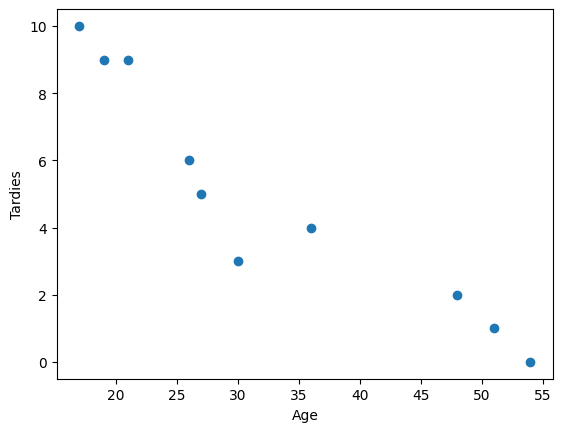

In [8]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [9]:
# Your response here. 
'''The relationship between age and number of tardies look like linear '''


'The relationship between age and number of tardies look like linear '

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [27]:
# Your response here.
#correlation:
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])
correlation[0][1]


-0.9391626886887122

In [28]:
#covariance:
covariance = np.cov(student_data['Age'], student_data['Tardies'])
covariance[0][1]

-45.56666666666666

In [29]:
"""Looking at the sign of both correlation and covariance I can tell that ages and tardies have a negative direction of their linear relationship (when one grows the other one decrease)"""

'Looking at the sign of both correlation and covariance I can tell that ages and tardies have a negative direction of their linear relationship (when one grows the other one decrease)'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
student_data['Age'].to_numpy().reshape(-1, 1)

array([[17],
       [51],
       [27],
       [21],
       [36],
       [48],
       [19],
       [26],
       [54],
       [30]])

In [44]:
# Your response here.
regr = linear_model.LinearRegression()

regr.fit(student_data['Age'].to_numpy().reshape(-1, 1), student_data['Tardies'].to_numpy().reshape(-1, 1))


LinearRegression()

In [48]:
print(f'coefficient: {regr.coef_[0]} and intercept: {regr.intercept_[0]}')

coefficient: [-0.24282077] and intercept: 12.888803363135771


Plot your regression model on your scatter plot.

In [66]:
# Your code here.
predictions = regr.predict(student_data['Age'].to_numpy().reshape(-1, 1))


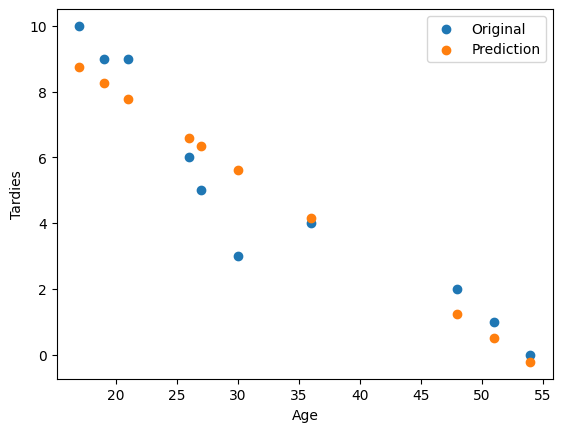

In [65]:
plt.scatter(student_data['Age'], student_data['Tardies'], label='Original')
plt.scatter(student_data['Age'], predictions, label='Prediction')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [72]:
# Your response here. 
'''Based on the results, there seems to be a linear relashionship given the current data, but we have too few data to conclude. Further, we did not do any train/test split to measure the error, so we do not know how well the linear model would be on data not used for training'''

'Based on the results, there seems to be a linear relashionship given the current data, but we have too few data to conclude. Further, we did not do any train/test split to measure the error, so we do not know how well the linear model would be on data not used for training'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [76]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/anna/iron_hack/lab-regression-analysis/your-code/vehicles.csv')
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [121]:
# Your response here. 
selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles_selected = vehicles[selected_columns]
vehicles_selected.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [82]:
correlations = vehicles_selected.corr()['CO2 Emission Grams/Mile']
correlations

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [83]:
'''As the number of cylinders in the engine increases, CO2 emissions per mile also tend to increase. Also as fuel consumption increases, CO2 emissions also increase proportionally. On the other hand, variables like Combined MPG show a strong negative correlation, which means that vehicle fuel efficiency in reducing emissions.'''

'As the number of cylinders in the engine increases, CO2 emissions per mile also tend to increase. Also as fuel consumption increases, CO2 emissions also increase proportionally. On the other hand, variables like Combined MPG show a strong negative correlation, which means that vehicle fuel efficiency in reducing emissions.'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [84]:
# Your response here. 

X = vehicles_selected.drop('CO2 Emission Grams/Mile', axis=1)
y = vehicles_selected['CO2 Emission Grams/Mile']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [90]:
mse

289.8277440813781

In [91]:
r2

0.9794542628636334

In [122]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 755.6935073143338
Coefficient: -0.3155867545878959


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [97]:
# Your response here. 
'''MSE of 289.83 means that, on average, the squared difference between the actual CO2 emissions and the predicted CO2 emissions is around 289.83 grams/mile squared. An R2 value of 0.979 indicates that the model explains about 97.9% of the variance in the CO2 emissions. The model is able to predict CO2 emissions very well.'''


'MSE of 289.83 means that, on average, the squared difference between the actual CO2 emissions and the predicted CO2 emissions is around 289.83 grams/mile squared. An R2 value of 0.979 indicates that the model explains about 97.9% of the variance in the CO2 emissions. The model is able to predict CO2 emissions very well.'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [99]:
# Your code here.
parties_attendance = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
parties_attendance

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

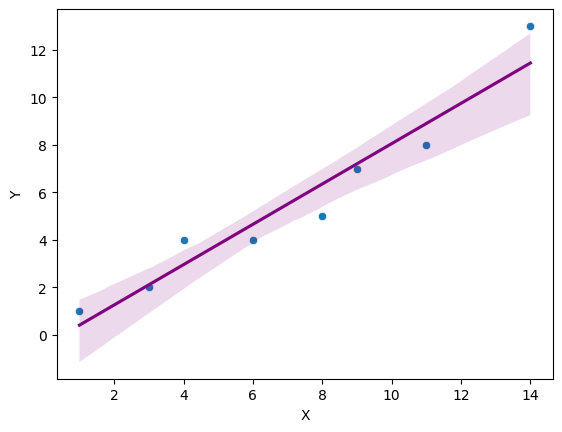

In [114]:
# Your code here.
sns.scatterplot(x='X', y='Y', data=parties_attendance)
sns.regplot(x='X', y='Y', data=parties_attendance, scatter=False, color='purple')



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [103]:
# Your response here. 
X = parties_attendance[['X']]
Y = parties_attendance['Y']

regression_model = LinearRegression()
regression_model.fit(X, Y)

LinearRegression()

In [104]:
y_pred = regression_model.predict(X)

In [116]:
print(f'Intercept: {regression_model.intercept_}')
print(f'Coefficient: {regression_model.coef_[0]}')

Intercept: -0.43939393939393945
Coefficient: 0.8484848484848485


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

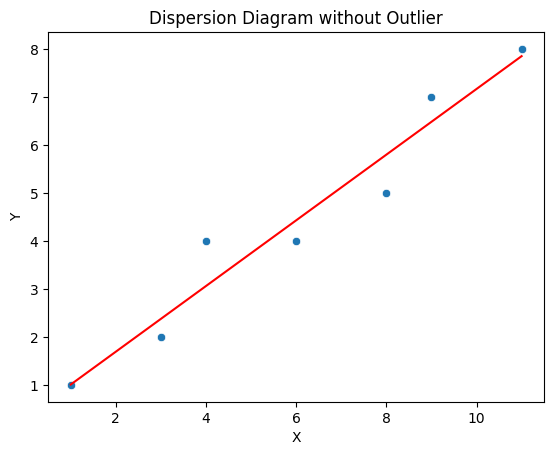

In [110]:
outlier_index = parties_attendance[parties_attendance['X'] == 14].index
cleaned_data = parties_attendance.drop(index=outlier_index)

X_cleaned = cleaned_data[['X']]
Y_cleaned = cleaned_data['Y']

regression_model_cleaned = LinearRegression()
regression_model_cleaned.fit(X_cleaned, Y_cleaned)

sns.scatterplot(x='X', y='Y', data=cleaned_data)
plt.title('Dispersion Diagram without Outlier')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X_cleaned, regression_model_cleaned.predict(X_cleaned), color='red', label='Regression Line')


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [117]:
# Your response here. 
print(f'Intercept: {regression_model_cleaned.intercept_}')
print(f'Coefficient: {regression_model_cleaned.coef_[0]}')

Intercept: 0.32330827067669254
Coefficient: 0.6842105263157894


In [118]:
"""Removing the outlier resulted in a slightly smaller coefficient, indicating a slightly smaller impact of the amount of invited people to parties on attendance."""

'Removing the outlier resulted in a slightly smaller coefficient, indicating a slightly smaller impact of the amount of invited people to parties on attendance.'